In [1]:
import xarray as xr

In [4]:
path_to_file = '/project2/scicala/era5/cdsapi_requested_files/reanalysis_era5_request_2m_temperature_202001_hourly.nc'
t2m = xr.open_dataset(path_to_file)

In [11]:
t2m_chunk = t2m.chunk({
    'time': 1 
})

In [12]:
t2m_chunk

,Array,Chunk
Bytes,1.49 GB,4.15 MB
Shape,"(358, 721, 1440)","(1, 721, 1440)"
Count,359 Tasks,358 Chunks
Type,float32,numpy.ndarray


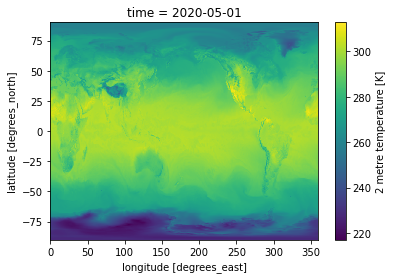

In [13]:
t2m.isel(time=0).t2m.plot()

In [8]:
t2m_flip = t2m.assign_coords(
        longitude=(((t2m.longitude + 180) % 360) - 180)
    ).\
    sortby('longitude')

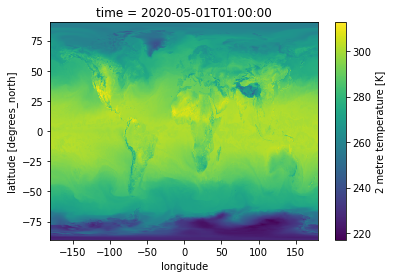

In [10]:
t2m_flip.isel(time=1).t2m.plot()